In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"D:\target\ml\StrokePrediction\archive\healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df=df.drop(columns='id',axis =1)

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
categorical_features=['gender',	'hypertension',	'heart_disease','ever_married',	'work_type','Residence_type','avg_glucose_level','smoking_status','stroke']
unique_values= {col:df[col].unique() for col in categorical_features}

In [7]:
for col, values in unique_values.items():
    print(f"{col}:{values}")

gender:['Male' 'Female' 'Other']
hypertension:[0 1]
heart_disease:[1 0]
ever_married:['Yes' 'No']
work_type:['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type:['Urban' 'Rural']
avg_glucose_level:[228.69 202.21 105.92 ...  82.99 166.29  85.28]
smoking_status:['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke:[1 0]


In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [10]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [11]:
import plotly.express as px
px.bar(x=df['stroke'].value_counts().index,y=df['stroke'].value_counts(),color=df['stroke'].value_counts().index)

In [12]:
numerical_features= ['age','avg_glucose_level','bmi']
df[numerical_features].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

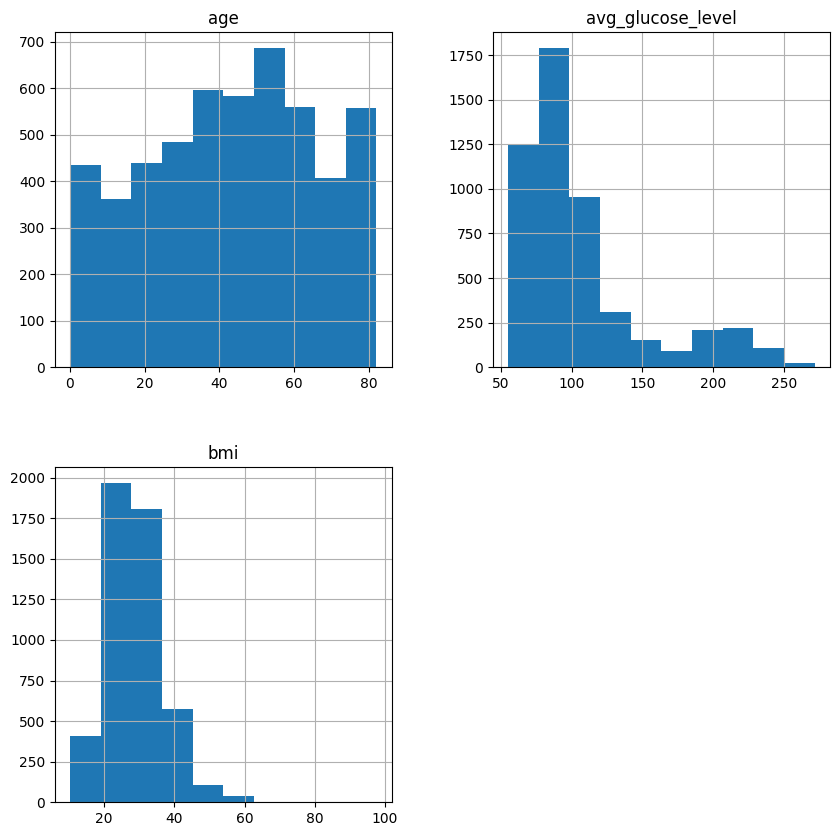

In [13]:
df[numerical_features].hist(figsize=(10,10))

In [14]:
fig= px.histogram(df, x='gender', width=400)
fig.show()

In [15]:
round(df[df['gender']=='Male']['stroke'].mean()*100,2)

5.11

In [16]:
round(df[df['gender']=='Female']['stroke'].mean()*100,2)

4.71

In [17]:
fig= px.histogram(df, x='hypertension', width=400)
fig.show()

In [18]:
round(df[df['hypertension']==1]['stroke'].mean()*100,2)

13.25

In [19]:
round(df[df['hypertension']==0]['stroke'].mean()*100,2)

3.97

In [20]:
fig= px.histogram(df, x='heart_disease', width=400)
fig.show()

In [21]:
round(df[df['heart_disease']==1]['stroke'].mean()*100,2)

17.03

In [22]:
round(df[df['heart_disease']==0]['stroke'].mean()*100,2)

4.18

In [23]:
fig= px.histogram(df, x='ever_married', width=400)
fig.show()

In [24]:
round(df[df['ever_married']=='Yes']['stroke'].mean()*100,2)

6.56

In [25]:
round(df[df['ever_married']=='No']['stroke'].mean()*100,2)

1.65

In [26]:
fig= px.histogram(df, x='work_type', width=400)
fig.show()

In [27]:
stroke_percentage_work_type = df.groupby('work_type')['stroke'].mean()*100
stroke_percentage_work_type.sort_values(ascending=False)

work_type
Self-employed    7.936508
Private          5.094017
Govt_job         5.022831
children         0.291121
Never_worked     0.000000
Name: stroke, dtype: float64

In [28]:
fig= px.histogram(df, x='Residence_type', width=400)
fig.show()

In [29]:
round(df[df['Residence_type']=='Urban']['stroke'].mean()*100,2)

5.2

In [30]:
round(df[df['Residence_type']=='Rural']['stroke'].mean()*100,2)

4.53

In [31]:
fig= px.histogram(df, x='smoking_status', width=400)
fig.show()

In [32]:
stroke_percentage_work_type = df.groupby('smoking_status')['stroke'].mean()*100
stroke_percentage_work_type.sort_values(ascending=False)

smoking_status
formerly smoked    7.909605
smokes             5.323194
never smoked       4.756871
Unknown            3.044041
Name: stroke, dtype: float64

In [33]:
from sklearn.metrics import mutual_info_score
categorical_features=['gender',	'hypertension',	'heart_disease','ever_married',	'work_type','Residence_type','smoking_status']
for col in categorical_features:
    mi=mutual_info_score(df[col],df['stroke'])
    print(f"{col}:{mi:.2f}")

gender:0.00
hypertension:0.01
heart_disease:0.01
ever_married:0.01
work_type:0.01
Residence_type:0.00
smoking_status:0.00


In [34]:
df[numerical_features + ['stroke']].corr()

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.333398,0.245257
avg_glucose_level,0.238171,1.000000,0.175502,0.131945
bmi,0.333398,0.175502,1.000000,0.042374
stroke,0.245257,0.131945,0.042374,1.000000


In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from joblib import dump
import matplotlib.pyplot as plt

def load_data():
    df = pd.read_csv(r"D:\target\ml\StrokePrediction\archive\healthcare-dataset-stroke-data.csv")
    df = df.drop('id', axis=1)
    categorical = ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    numerical = ['avg_glucose_level', 'bmi', 'age']
    y = df['stroke']
    X = df.drop('stroke', axis=1)
    return X, y, categorical, numerical


In [36]:
def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

# Load data
X, y, categorical, numerical = load_data()
print(X.shape, y.shape)



(5110, 10) (5110,)


LDA 0.838 (0.030)


C:\Users\Asus\AppData\Local\Temp\ipykernel_3356\661658885.py:21: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



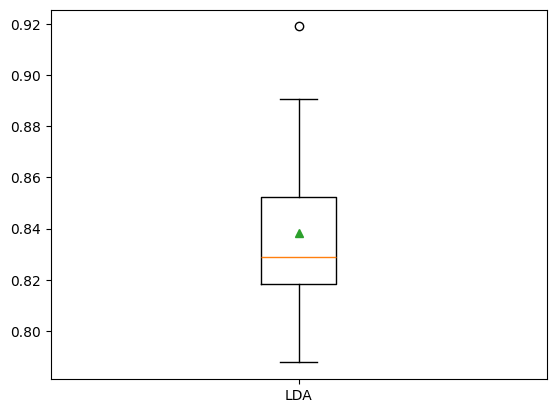

['stroke_prediction_model.joblib']

In [37]:
model = LinearDiscriminantAnalysis()

# Prepare the pipeline
transformer = ColumnTransformer(transformers=[
    ('imp', SimpleImputer(strategy='median'), numerical),
    ('o', OneHotEncoder(handle_unknown='ignore'), categorical)  # handle_unknown='ignore' to manage unseen categories
])

pipeline = Pipeline(steps=[
    ('t', transformer),
    ('p', PowerTransformer(method='yeo-johnson', standardize=True)),
    ('over', SMOTE()),
    ('m', model)
])

# Evaluate the model
scores = evaluate_model(X, y, pipeline)
print('LDA %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

# Plot the results
plt.boxplot([scores], labels=['LDA'], showmeans=True)
plt.show()

# Fit the pipeline on the entire dataset
pipeline.fit(X, y)

# Save the trained pipeline
dump(pipeline, 'stroke_prediction_model.joblib')